# Decision Visualization for Emotional DAN


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [68]:
tf.__version__

'1.8.0'

In [3]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

set_session(tf.Session(config=config))

Using TensorFlow backend.


In [4]:
import sys
print(sys.path)
sys.path.append('gradcam')
print(sys.path)

['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']
['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', 'gradcam']


### Load Emotional DAN

In [5]:
from models import emoDAN
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# EmoDAN directories

datasetDir = "/home/workspace/itautkute/emotionaldan/data/"
trainSet = np.load(datasetDir + "AffectnetVal_7.npz")
initLandmarks = trainSet['Landmark'][0].reshape((1,136))

danPath = '/home/workspace/itautkute/emotionaldan/Model2/Model2'
img_mean = trainSet['ImgMean']
img_std = trainSet['ImgStd']


In [7]:
validationSet = np.load(datasetDir + "Test_CK_224_7.npz")

Xvalid = validationSet['Image']
Yvalid = validationSet['Landmark']
Yvalid_em = validationSet['Emotion']

Xtrain = trainSet['Image']
Ytrain = trainSet['Landmark']
Ytrain_em = trainSet['Emotion']

In [8]:
# Load emodan

emodan = emoDAN(initLandmarks, 50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### Inference and visualisation

In [9]:
tf_sess =  tf.Session()  
Saver = tf.train.Saver()
Saver.restore(tf_sess, danPath)

INFO:tensorflow:Restoring parameters from /home/workspace/itautkute/emotionaldan/Model2/Model2


In [10]:
from grad_cam import visualize, get_gradcam, get_heatmap, overlay_cam

Predicted emotion: Happiness
True emotion Happiness
Neutral 0.020626066
Happiness 0.9418881
Sadness 0.00054758415
Surprise 0.018492918
Fear 0.0009239271
Disgust 0.0048891217
Anger 0.012632325


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


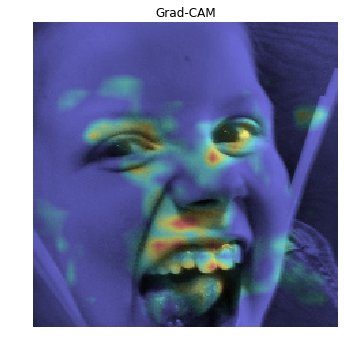

In [10]:
idx = 109
batch_img, batch_label = [Xtrain[idx]], [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, tf_sess, conv_layer='S2_Conv4a')

In [11]:
idx = 130
batch_img, batch_label = [Xtrain[idx]], [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, tf_sess, conv_layer='S2_Conv4a')

Predicted emotion: Surprise
True emotion Fear


Predicted emotion: Happiness
True emotion Happiness


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


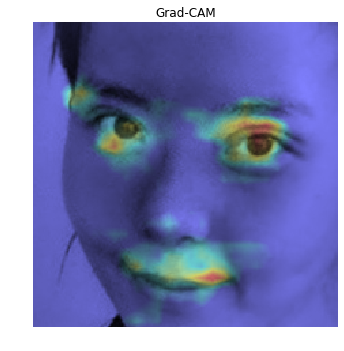

In [12]:
# Image for demo

idx = 115
batch_img = [Xtrain[idx]]
batch_label = [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, tf_sess, img_mask=0, conv_layer='S2_Conv4a')

Predicted emotion: Happiness
True emotion Happiness


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


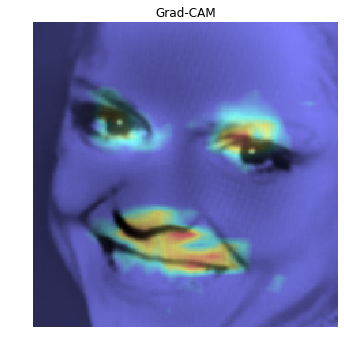

In [13]:
# Image for demo

idx = 112
batch_img = [Xtrain[idx]]
batch_label = [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, tf_sess, img_mask=0, conv_layer='S2_Conv4a')

Predicted emotion: Happiness
True emotion Happiness


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


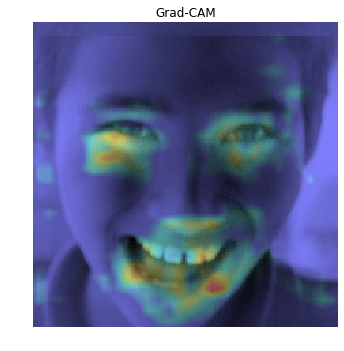

In [15]:
idx = 198
batch_img, batch_label = [Xtrain[idx]], [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, tf_sess, img_mask=0, conv_layer='S2_Conv4a')

Predicted emotion: Anger
True emotion Anger


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


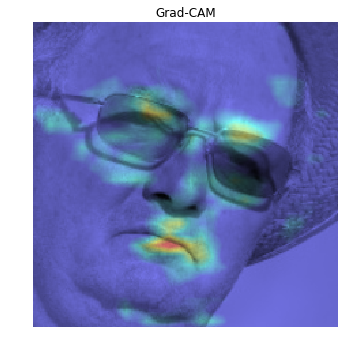

In [34]:
idx = 217
batch_img, batch_label = [Xtrain[idx]], [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, tf_sess, img_mask=0, conv_layer='S2_Conv4a')

Predicted emotion: Happiness
True emotion Happiness


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


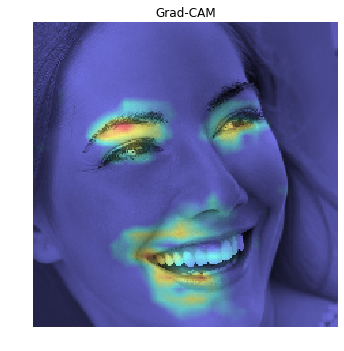

<Figure size 432x288 with 0 Axes>

In [18]:
idx = 204
batch_img, batch_label = [Xtrain[idx]], [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, tf_sess, img_mask=0, conv_layer='S2_Conv4a', outFile='graphics/gradcam1.png')

## Grid of images

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


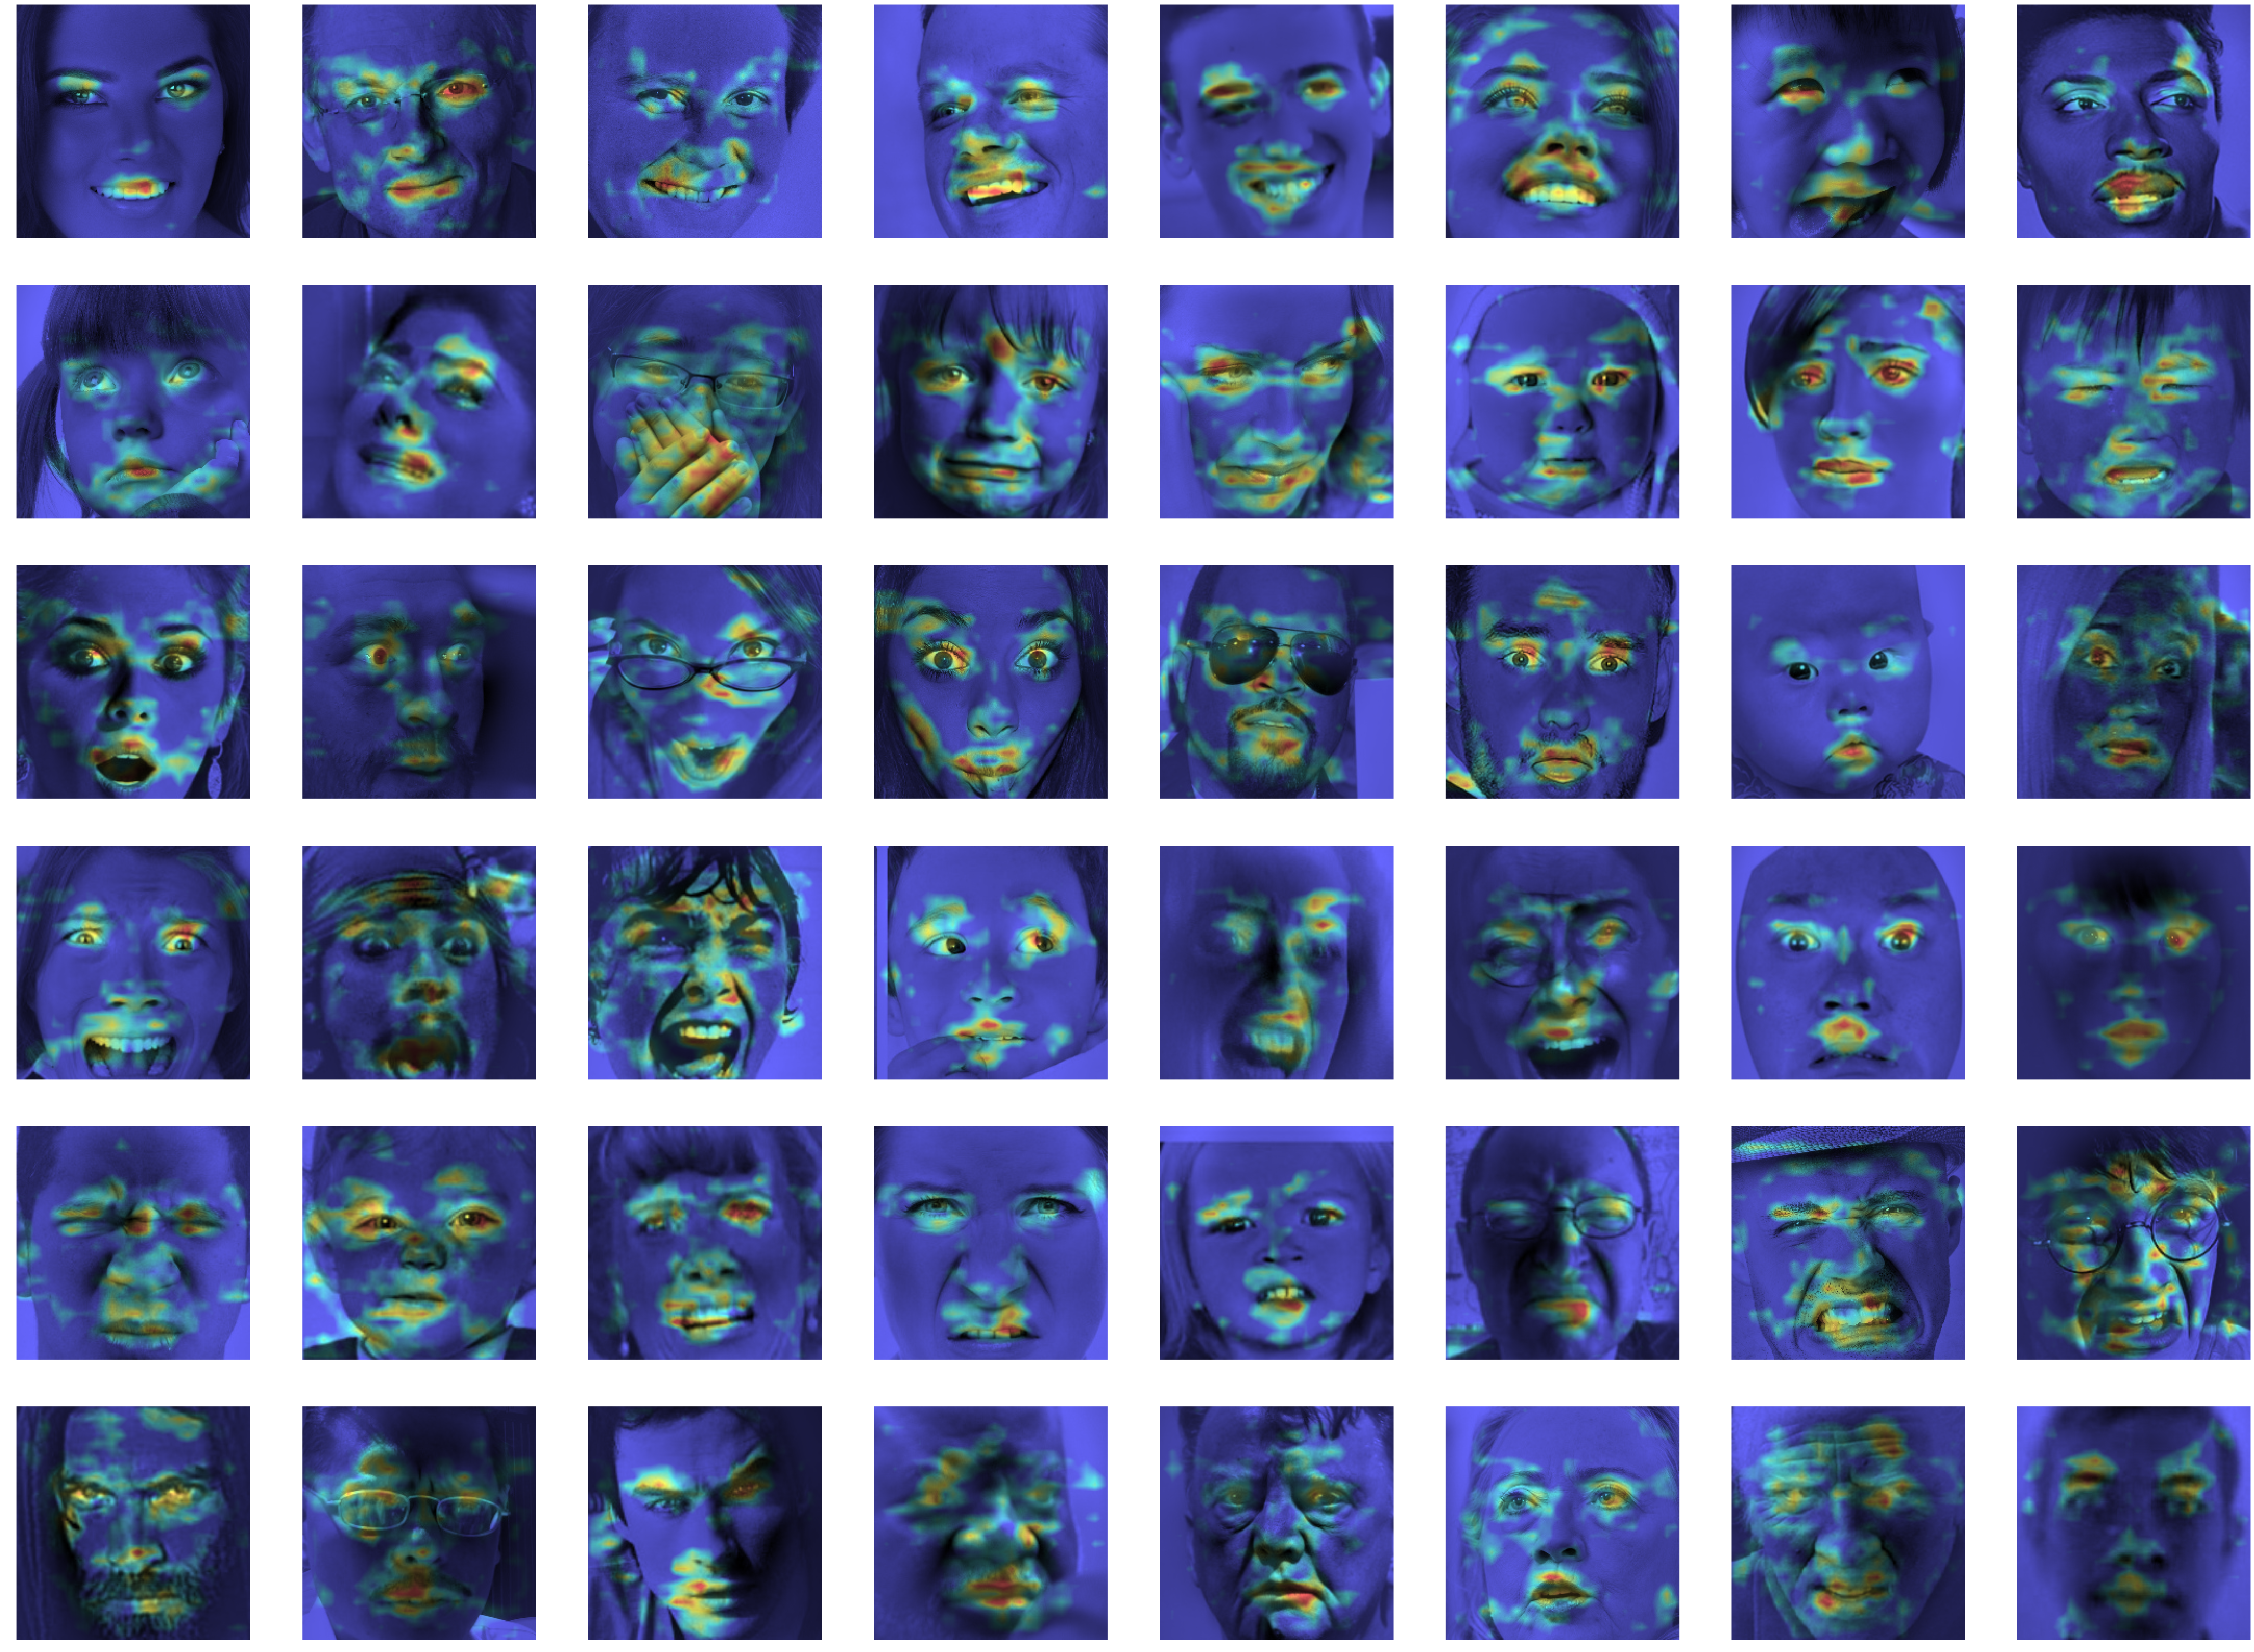

In [15]:
N, M = 8, 6

f, axarr = plt.subplots(M,N, figsize=(80,60))

for i in range(M):
    em = i+1
    img_id = 0
    for j in range(N):
        for idx in range(img_id, 10000):
            if Ytrain_em[idx] == em:
#                 print(idx)
                batch_img, batch_label = [Xtrain[idx]], [Ytrain_em[idx]]
                img = np.reshape(Xtrain[idx], (224, 224))
                cam = get_gradcam(batch_img, batch_label, danPath, emodan, tf_sess, img_mask=0, conv_layer='S2_Conv4a')
                if len(cam)>0:
                    overlayed_cam = overlay_cam(Xtrain[idx], cam, 0.6, show=False)
                    axarr[i,j].imshow(overlayed_cam, cmap='gray')
                    axarr[i,j].axis('off')
                    img_id = idx + 1
                    break
                    
plt.savefig('graphics/gradcams_per_emotion.png')
        

### Visualize with landmarks

In [11]:
from utils import get_landmark_nb_dict
from grad_cam import get_most_activated_landmarks

Predicted emotion: Anger
True emotion Anger
Neutral 0.09862698
Happiness 0.036727205
Sadness 0.016550254
Surprise 0.00028672983
Fear 0.00028664002
Disgust 0.11285263
Anger 0.7346695


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


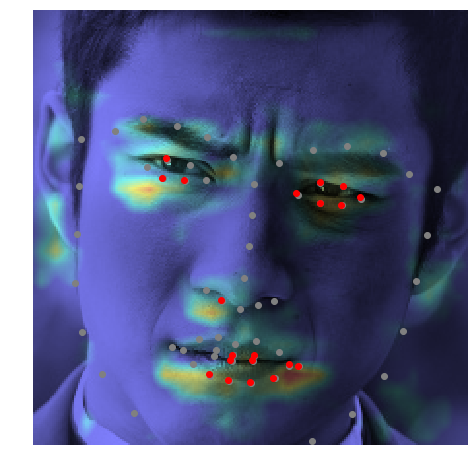

In [67]:
idx = 855
batch_img, batch_label, batch_landmarks = [Xtrain[idx]], [Ytrain_em[idx]], [Ytrain[idx]]

# Plot Grad-CAM
cam = get_gradcam(batch_img, batch_label, danPath, emodan,
                      tf_sess, img_size=224, conv_layer='S2_Conv4a', logging=True)

img = batch_img[0]
img_overlay = overlay_cam(img, cam, 0.5, show=False)

if img_overlay is not None:

    # Plot landmarks 
    
    x_s = batch_landmarks[0][0:][::2]
    y_s = batch_landmarks[0][1:][::2]

    plt.figure(figsize=(8, 8))
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.imshow(img_overlay)
    for x, y in zip(x_s, y_s):
        if 0 <= x <= 224 and 0 <= y <= 224:
            plt.scatter([x],[y], c='grey')
    
    # Plot activated landmarks
    xy_to_landmarks = get_landmark_nb_dict(batch_landmarks[0])


        
    active_landmarks = get_most_activated_landmarks(cam, batch_landmarks[0], k=20)
    active_landmarks_numbers = [xy_to_landmarks[a,b] for a,b in active_landmarks]

    active_landmarks_x = [x for x, _ in active_landmarks]
    active_landmarks_y = [y for  _, y in active_landmarks]
    
    plt.scatter(active_landmarks_x,  active_landmarks_y, c = 'red')
            
            
    plt.savefig('graphics/gradcam{}.png'.format(str(idx)))